In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [747]:
#build the vocabulary of characters and mappings to /from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)


{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [690]:
''.join(words[:3])

'emmaoliviaava'

In [761]:
#build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []

for w in words:
    
    #print(w)
    context = [0] * block_size #initialize context
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print (''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] #corp and append
       # print(context)
X = torch.tensor(X)
Y = torch.tensor(Y)

In [762]:
X.shape



torch.Size([228146, 3])

In [750]:
C = torch.randn(27, 2) #lookup table 27 char --> 2 dim, i.e, each char have 2 dim embedding

In [751]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C # == C[5]

tensor([ 0.6845, -0.6394])

In [695]:
C = torch.randn(27, 5) # lookup table -- > 27 words, 2 dimensional embeding --> lookup previous 2 chars to predict next char

In [752]:
C.shape

torch.Size([27, 2])

In [753]:
C[X]

tensor([[[-0.0986, -0.5557],
         [-0.0986, -0.5557],
         [-0.0986, -0.5557]],

        [[-0.0986, -0.5557],
         [-0.0986, -0.5557],
         [ 0.6845, -0.6394]],

        [[-0.0986, -0.5557],
         [ 0.6845, -0.6394],
         [-1.5286,  0.9493]],

        [[ 0.6845, -0.6394],
         [-1.5286,  0.9493],
         [-1.5286,  0.9493]],

        [[-1.5286,  0.9493],
         [-1.5286,  0.9493],
         [-0.4221, -0.0586]],

        [[-0.0986, -0.5557],
         [-0.0986, -0.5557],
         [-0.0986, -0.5557]],

        [[-0.0986, -0.5557],
         [-0.0986, -0.5557],
         [ 1.1324,  0.3090]],

        [[-0.0986, -0.5557],
         [ 1.1324,  0.3090],
         [-1.6725, -2.2583]],

        [[ 1.1324,  0.3090],
         [-1.6725, -2.2583],
         [ 0.1699, -0.3127]],

        [[-1.6725, -2.2583],
         [ 0.1699, -0.3127],
         [-0.9302, -0.2647]],

        [[ 0.1699, -0.3127],
         [-0.9302, -0.2647],
         [ 0.1699, -0.3127]],

        [[-0.9302, -0

In [754]:
emb = C[X]


emb.shape

torch.Size([32, 3, 2])

In [699]:
#first layer parameters, 3 x 2 x 100
W1 = torch.randn(15
                 , 100) # 100 neurons
b1 = torch.randn(100) #100 bias term to neuron

In [700]:
#transform the shape of emb to fit matrix multiplication to W1
h = torch.tanh(emb.view(-1, 15) @ W1 + b1)

In [701]:
h.shape



torch.Size([32, 100])

In [702]:
h

tensor([[-0.9995,  0.9888,  0.5100,  ..., -0.8800, -0.8515, -0.4271],
        [-0.9983,  0.6917,  0.9998,  ..., -0.9999, -0.8806,  0.9589],
        [ 0.9891,  0.9876,  0.4569,  ..., -0.9668,  0.9951, -0.6034],
        ...,
        [ 0.6661, -0.8786,  0.6220,  ...,  0.3250,  0.3802, -0.2521],
        [-0.2782, -0.9999, -1.0000,  ...,  1.0000, -0.8547, -0.9208],
        [ 0.9050,  0.9998, -0.0258,  ..., -0.9712, -1.0000,  1.0000]])

In [703]:
#input to softmax layer, 100 x 27 possible char
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [704]:


logits = h @ W2 + b2

In [705]:
logits.shape

torch.Size([32, 27])

In [706]:
counts = logits.exp()

In [707]:
prob = counts /counts.sum(1, keepdims=True)

In [708]:
prob[0, 5]

tensor(2.2428e-06)

In [709]:
prob[torch.arange(32), Y]

tensor([2.2428e-06, 2.0680e-08, 8.3504e-09, 3.1232e-05, 7.2975e-07, 4.5319e-01,
        1.5187e-06, 3.6063e-06, 4.0435e-09, 1.4794e-11, 3.2137e-11, 2.4632e-06,
        2.2559e-06, 7.4026e-11, 2.6240e-09, 5.9102e-03, 3.1566e-04, 2.3194e-05,
        1.7465e-07, 6.5374e-11, 1.5169e-11, 1.3706e-11, 1.1249e-17, 3.0054e-14,
        4.4059e-07, 1.6391e-01, 4.2207e-02, 2.9345e-08, 5.5699e-09, 2.6130e-08,
        7.4911e-11, 1.0870e-03])

In [710]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(16.3898)

In [711]:
prob[torch.arange(32)][0]

tensor([2.2210e-07, 2.2559e-06, 7.3466e-07, 2.9855e-12, 4.9490e-09, 2.2428e-06,
        2.1402e-07, 3.0087e-01, 1.7140e-06, 3.1566e-04, 8.4751e-03, 2.2063e-04,
        6.9348e-02, 3.5632e-03, 1.6264e-09, 4.5319e-01, 1.0576e-05, 2.3023e-07,
        3.0924e-06, 1.6391e-01, 1.3745e-06, 2.4648e-11, 1.2011e-06, 3.3874e-05,
        1.2436e-11, 4.2084e-10, 4.4028e-05])

In [712]:
Y.shape

torch.Size([32])

In [713]:
Xtr.shape, Ytr.shape #dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [809]:

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]


In [801]:
sum(p.nelement() for p in parameters)

3481

In [810]:
for p in parameters:
    p.requires_grad = True

In [766]:
#cross_entropy -->  more efficient in forward/backward propa
#better behave in extreme no. 
#
for _ in range(10):
    emb = C[X]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32, 100)
    logits = h @ W2 + b2 #(32, 27)
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    for p in parameters:
        p.data += -0.1 * p.grad

    

19.505229949951172
17.08448600769043
15.776532173156738
14.833341598510742
14.002605438232422
13.253264427185059
12.57992172241211
11.983102798461914
11.470495223999023
11.05185604095459


In [772]:
#exp() learning rate
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre


In [811]:
lri = []
lossi = []

for i in range(1000):
    
    #minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    #forward pass
    emb = C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 # (32,27)
    loss = F.cross_entropy(logits, Y[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    lr = 0.1
   
    for p in parameters:
        p.data += -lr * p.grad

    #keep track learning rate
    lri.append(lre[i])
    lossi.append(loss.item())
    
#print(loss.item())    

19.136789321899414
17.372060775756836
16.798561096191406
19.977079391479492
19.15423583984375
17.900266647338867
20.524044036865234
16.46435546875
18.727149963378906
20.794191360473633
19.53757667541504
16.874536514282227
18.895240783691406
19.426504135131836
17.91095733642578
19.258230209350586
19.8751277923584
20.822153091430664
17.852022171020508
18.77287483215332
20.36738395690918
19.809144973754883
18.468608856201172
17.867361068725586
16.040945053100586
19.05195426940918
15.988335609436035
18.115253448486328
20.41436195373535
18.48023223876953
19.446630477905273
20.55914878845215
19.67064666748047
18.840679168701172
18.45418930053711
19.019775390625
18.695138931274414
16.745996475219727
19.04158592224121
13.876065254211426
21.293087005615234
20.300752639770508
17.10323715209961
21.112350463867188
17.605287551879883
15.002725601196289
19.114015579223633
16.641521453857422
18.22793197631836
15.683999061584473
22.67888832092285
13.533074378967285
20.268869400024414
19.35477638244629

3.1060893535614014
2.991081714630127
3.8851418495178223
3.837829113006592
3.4195122718811035
3.108060836791992
3.972668409347534
2.7463505268096924
3.673353672027588
3.231027841567993
3.32603120803833
3.479602813720703
2.9073705673217773
3.028646469116211
3.453840732574463
3.4582979679107666
3.0246574878692627
3.455716133117676
2.788843870162964
3.330383062362671
3.6544220447540283
3.8240392208099365
3.183600664138794
3.8480007648468018
3.940333604812622
2.862694501876831
3.642937660217285
3.572749376296997
3.4200446605682373
3.0023343563079834
3.224271059036255
4.653891086578369
3.6814494132995605
3.4729909896850586
4.030686378479004
3.083131790161133
3.9803497791290283
4.471494674682617
3.1781835556030273
3.7902791500091553
3.8276748657226562
3.9796688556671143
3.593444347381592
3.7291760444641113
4.135162353515625
4.318716049194336
3.0198824405670166
3.294132947921753
3.4555275440216064
3.1150729656219482
3.776724338531494
4.295830726623535
3.5591206550598145
3.3151650428771973
3.19

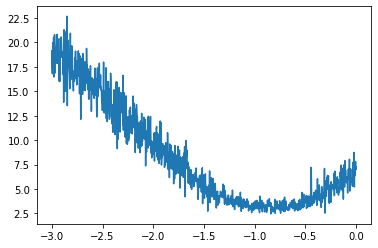

In [812]:
plt.plot(lri, lossi)

In [671]:
print(loss.item())

2.0930211544036865


In [672]:
def build_dataset(words):
    block_size = 3 
    X, Y =[], []
    
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtre, Yte = build_dataset(words[n2:])



torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


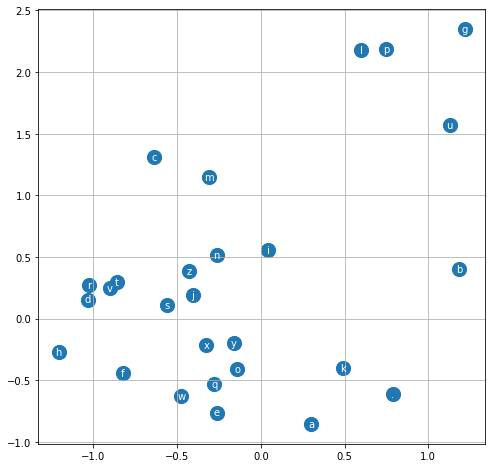

In [813]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minior')
    
#here we use 2-dims feature on each char (2 dims embedding)
 

In [674]:
C.shape




torch.Size([27, 2])

In [412]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

RuntimeError: mat1 and mat2 shapes cannot be multiplied (913125x6 and 30x200)

In [222]:
torch.randint(0, 5, (3`2,))

tensor([2, 4, 1, 0, 4, 4, 3, 4, 0, 3, 1, 4, 2, 1, 4, 0, 1, 3, 4, 4, 2, 2, 0, 2,
        0, 0, 3, 0, 2, 0, 0, 4])

In [223]:
X.shape[0]

228146

In [278]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.6402, grad_fn=<NllLossBackward0>)

In [136]:
logits.max(1)

torch.return_types.max(
values=tensor([13.4215, 17.9623, 20.6614, 20.7191, 16.8602, 13.4215, 16.0943, 14.2871,
        16.0157, 18.5257, 16.0755, 21.0548, 13.4215, 17.2680, 17.2813, 20.2045,
        13.4215, 16.5877, 15.2853, 17.1979, 18.6986, 16.1047, 10.9960, 10.7950,
        15.5886, 13.4215, 16.3412, 17.0727, 12.8242, 16.3027, 19.2262, 16.1899],
       grad_fn=<MaxBackward0>),
indices=tensor([ 9, 13, 13,  1,  0,  9, 12,  9, 22,  9,  1,  0,  9, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0,  9, 15, 16,  8,  9,  1,  0]))

In [134]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])